In [1]:
##1.Loading and Preprocessing

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [16]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Cluster            150 non-null    int32  
 5   Agglo_Cluster      150 non-null    int64  
dtypes: float64(4), int32(1), int64(1)
memory usage: 6.6 KB


In [18]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Cluster              0
Agglo_Cluster        0
dtype: int64

In [20]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Cluster,Agglo_Cluster
0,5.1,3.5,1.4,0.2,1,1
1,4.9,3.0,1.4,0.2,1,1
2,4.7,3.2,1.3,0.2,1,1
3,4.6,3.1,1.5,0.2,1,1
4,5.0,3.6,1.4,0.2,1,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,0,2
148,6.2,3.4,5.4,2.3,0,2


In [3]:
##2.Clustering Algorithm Implementation 

##A) KMeans Clustering
    The algorithm partitions the dataset into k clusters.
    It assigns each point to the nearest cluster center, minimizing the variance within clusters.
    Cluster centers are iteratively updated until convergence.
Why suitable for Iris Dataset:
    Iris has well-separated clusters based on its features, which aligns with KMeans's strength of grouping data into spherical clusters.

C:\Users\Anirudh Kumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


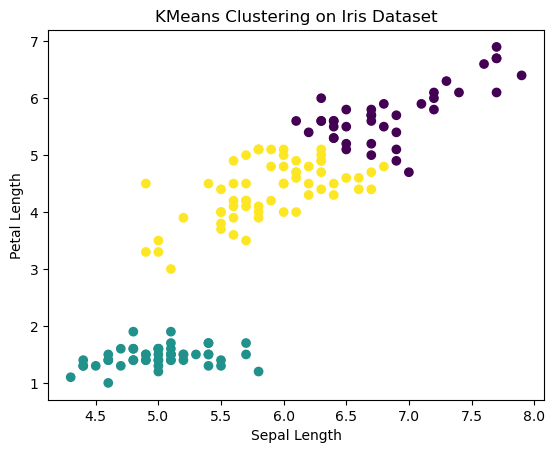

In [5]:
kmeans = KMeans(n_clusters=3, random_state=42)
iris_df['Cluster'] = kmeans.fit_predict(iris_df)
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 2], c=iris_df['Cluster'], cmap='viridis')
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.show()

##B) Hierarchical Clustering
    It creates a tree (dendrogram) that represents the nested grouping of data.
    Agglomerative Hierarchical Clustering starts with each point as its own cluster and merges the closest clusters iteratively.
Why suitable for Iris Dataset:
    It captures hierarchical relationships, which might reveal additional structure in the dataset.

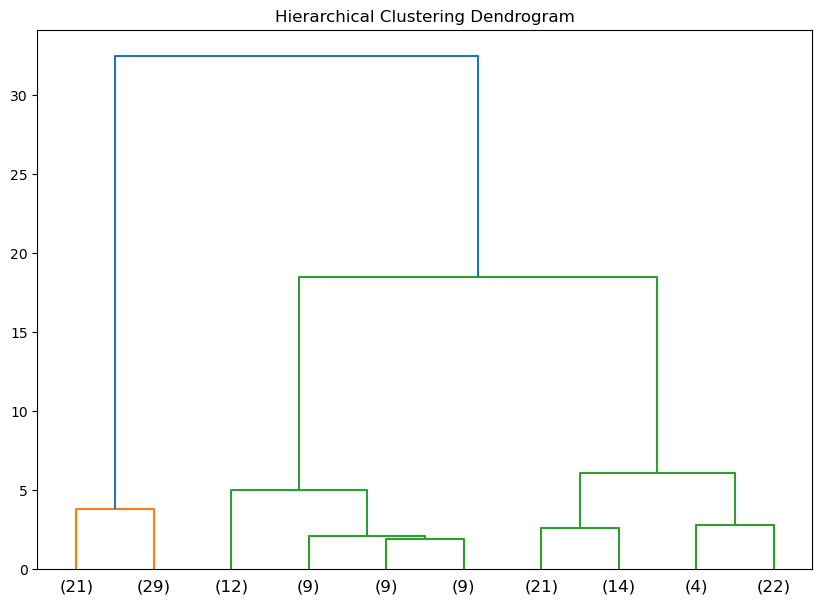

In [8]:
link = linkage(iris_df, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(link, truncate_mode='lastp', p=10)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

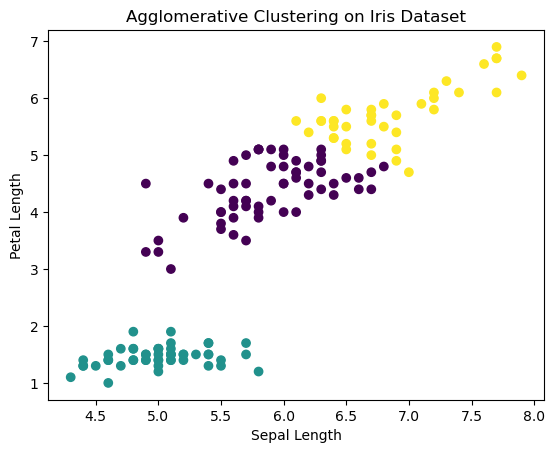

In [10]:
agglo = AgglomerativeClustering(n_clusters=3)
iris_df['Agglo_Cluster'] = agglo.fit_predict(iris_df)

plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 2], c=iris_df['Agglo_Cluster'], cmap='viridis')
plt.title("Agglomerative Clustering on Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.show()